## **Observations and Insights**

1. It would appear that Capomulin & Ramicane are  more effective drug treatments over Infubinol & Ceftamin for mice to reduce tumor growth over the course of 45 days. However, we would need to also look at the starting tumor volume of these mice to better be able to compare the affects of the treatment over the testing period.
2. There is a strong correlation (.84) between the weight of a mouse and the average tumor volume over a 45 day period.
3. Far more mice were treated with Capolmulin & Ramicane drugs compared to the other treatments options which allows for the sample sizes for these two treatments to have more data points to summarize. This is something to keep in mind when viewing our Summary Statistics. The standard error of the mean for both Capomulin (.329) & Ramicane (.321) are alot closer to 0 than the other drugs in this expirement as a result of having more data points. The next closest drug is Ceftamin (.470).

        

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.DataFrame(pd.read_csv(mouse_metadata_path))
study_results = pd.DataFrame(pd.read_csv(study_results_path))
# Combine the data into a single dataset
mouse_merged = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
mouse_merged 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice=mouse_merged["Mouse ID"].value_counts()
number_of_mice

g989    13
k210    10
a251    10
z581    10
a275    10
        ..
v199     1
f932     1
o848     1
t573     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID_Timepoint=mouse_merged.groupby(["Mouse ID", "Timepoint"])
duplicate_mice_ID_Timepoint.count().loc[duplicate_mice_ID_Timepoint["Drug Regimen"].count()>1,:]

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data=mouse_merged.loc[mouse_merged["Mouse ID"]=="g989"]
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merged= mouse_merged.loc[mouse_merged["Mouse ID"]!="g989"]
mouse_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice=mouse_merged["Mouse ID"].value_counts()
number_of_mice

k210    10
a644    10
z581    10
a275    10
r811    10
        ..
v199     1
f932     1
o848     1
t573     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Create a table grouped by drug regimens
drug_regimen_table = mouse_merged.groupby("Drug Regimen")

# Create series of mean, median, variance, standard deviation, and SEM
regimen_mean=drug_regimen_table["Tumor Volume (mm3)"].mean().map("{:.3f}".format)
regimen_median=drug_regimen_table["Tumor Volume (mm3)"].median().map("{:.3f}".format)
regimen_variance=drug_regimen_table["Tumor Volume (mm3)"].var().map("{:.3f}".format)
regimen_standard_deviation=drug_regimen_table["Tumor Volume (mm3)"].std().map("{:.3f}".format)
regimen_standard_error=drug_regimen_table["Tumor Volume (mm3)"].sem().map("{:.3f}".format)

# Create a DataFrame of the series' that were just created
drug_regimen=pd.DataFrame({"Mean":regimen_mean,
                           "Median":regimen_median,
                           "Variance:":regimen_variance,
                            "Std. Deviation": regimen_standard_deviation,
                            "Standard Error of Mean":regimen_standard_error})
drug_regimen



,Mean,Median,Variance:,Std. Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
pd.DataFrame({"Mean":mouse_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().map("{:.3f}".format),
              "Median":mouse_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().map("{:.3f}".format),
              "Variance":mouse_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().map("{:.3f}".format),
              "Std. Deviation":mouse_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().map("{:.3f}".format),
              "Standard Error of Mean":mouse_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().map("{:.3f}".format)})
              


,Mean,Median,Variance,Std. Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

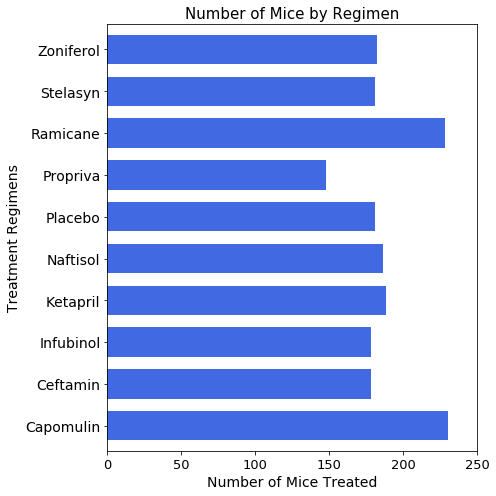

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

regimen_plot=drug_regimen_table["Mouse ID"].count().plot(kind="barh",figsize=(7,7),
                                            color="royalblue",
                                            xlim=(0,250),
                                            align="center",
                                            width=.7)

plt.title("Number of Mice by Regimen",fontsize=15)
plt.xlabel("Number of Mice Treated",fontsize=14)
plt.ylabel("Treatment Regimens",fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

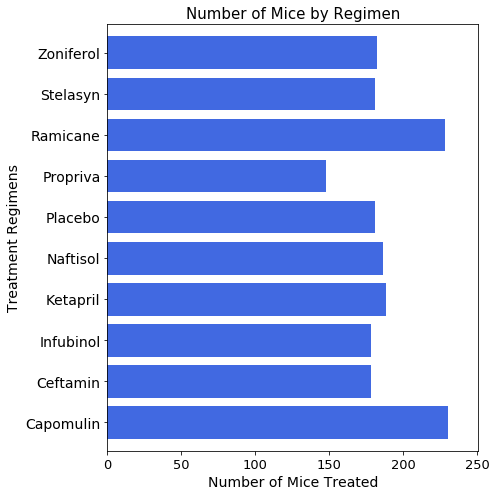

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
labels=list(drug_regimen_table["Mouse ID"].count().index.values)
number_mice=list(drug_regimen_table["Mouse ID"].count())

plt.figure(figsize=(7,7))
plt.barh(labels,number_mice,color="royalblue",align="center")
plt.margins(x=.09, y=.03)
plt.xlabel("Number of Mice Treated",fontsize=14)
plt.ylabel("Treatment Regimens",fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.title("Number of Mice by Regimen",fontsize=15)
plt.tight_layout()
plt.show()

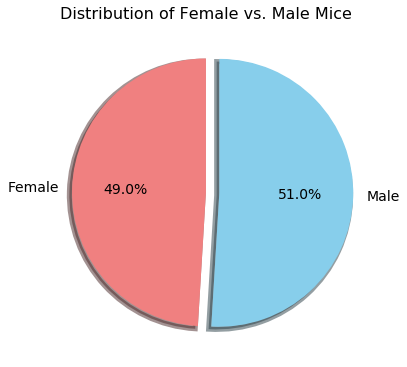

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors=["lightcoral","skyblue"]
explode=[0,.1]


mice_sex_type=mouse_merged.groupby("Sex")
mice_sex_count=pd.DataFrame({" ":mice_sex_type["Mouse ID"].count()})
mice_sex_count.plot.pie(y=" ",
                        figsize=(6,7),
                        colors=colors,
                        startangle=90,
                        autopct='%1.1f%%',
                        wedgeprops = {'linewidth': 5},
                        explode=explode,
                        textprops={'fontsize': 14},
                        legend=None,
                        shadow=True)
plt.title("Distribution of Female vs. Male Mice",fontsize=16)
plt.show()

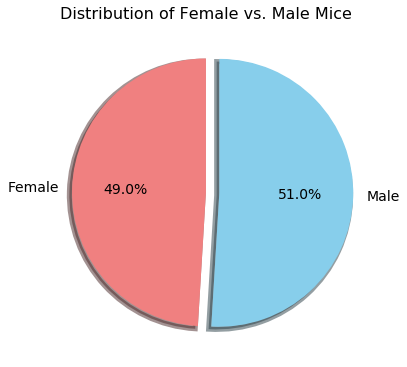

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6,7))
labels=list(mice_sex_type.count().index.values)
colors=["lightcoral","skyblue"]
explode=[0,.1]
plt.pie(mice_sex_type["Mouse ID"].count(),
        labels=labels,
        colors=colors,
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops = {'linewidth': 5},
        explode=explode,
        textprops={'fontsize': 14},
        shadow=True)
plt.title("Distribution of Female vs. Male Mice",fontsize=16)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_group=mouse_merged.groupby("Mouse ID")
mouse_id_group_max=pd.DataFrame({"Timepoint":mouse_id_group["Timepoint"].max()})
mouse_id_group_max
mouse_id_group_max=mouse_id_group_max.reset_index()
mouse_id_group_max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_merged_last=pd.merge(mouse_id_group_max,mouse_merged,on=["Timepoint","Mouse ID"],how="inner")
last_timepoint_df=mouse_merged_last.loc[:,["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
last_timepoint_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
2,a262,Placebo,70.717621,45
3,a275,Ceftamin,62.999356,45
4,a366,Stelasyn,63.440686,30
...,...,...,...,...
243,z435,Propriva,48.710661,10
244,z578,Ramicane,30.638696,45
245,z581,Infubinol,62.754451,45
246,z795,Naftisol,65.741070,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes and append the values to our tumor volume data
Capomulin=last_timepoint_df.loc[last_timepoint_df["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
tumor_vol_data.append(Capomulin.sort_values())

Ramicane=last_timepoint_df.loc[last_timepoint_df["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]
tumor_vol_data.append(Ramicane.sort_values())

Infubinol=last_timepoint_df.loc[last_timepoint_df["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"]
tumor_vol_data.append(Infubinol.sort_values())

Ceftamin=last_timepoint_df.loc[last_timepoint_df["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"]
tumor_vol_data.append(Ceftamin.sort_values())

In [15]:
##add subset 
Capomulin_upperq=Capomulin.quantile(.75)
Capomulin_lowerq=Capomulin.quantile(.25)
Capomulin_IQR=Capomulin_upperq-Capomulin_lowerq

Ramicane_upperq=Ramicane.quantile(.75)
Ramicane_lowerq=Ramicane.quantile(.25)
Ramicane_IQR=Ramicane_upperq-Ramicane_lowerq

Infubinol_upperq=Infubinol.quantile(.75)
Infubinol_lowerq=Infubinol.quantile(.25)
Infubinol_IQR=Infubinol_upperq-Infubinol_lowerq

Ceftamin_upperq=Ceftamin.quantile(.75)
Ceftamin_lowerq=Ceftamin.quantile(.25)
Ceftamin_IQR=Ceftamin_upperq-Ceftamin_lowerq

# Determine outliers using upper and lower bounds
Capomulin_upperb=Capomulin_upperq+(1.5*Capomulin_IQR)
Capomulin_lowerb=Capomulin_lowerq-(1.5*Capomulin_IQR)

print(f"For Caomulin, values below {Capomulin_lowerb} and values above {Capomulin_upperb}  are outliers.")
                      
Ramicane_upperb=Ramicane_upperq+(1.5*Ramicane_IQR)
Ramicane_lowerb=Ramicane_lowerq-(1.5*Ramicane_IQR)    

print(f"For Ramicane, values below {Ramicane_lowerb} and values above {Ramicane_upperb} are outliers.")
                      
Infubinol_upperb=Infubinol_upperq+(1.5*Infubinol_IQR)
Infubinol_lowerb=Infubinol_lowerq-(1.5*Infubinol_IQR) 

print(f"For Ifubinol, values below {Infubinol_lowerb}  and values above {Infubinol_upperb} are outliers.")

Ceftamin_upperb=Ceftamin_upperq+(1.5*Ceftamin_IQR)
Ceftamin_lowerb=Ceftamin_lowerq-(1.5*Ceftamin_IQR)

print(f"For Ceftamin, values below {Ceftamin_lowerb} and values above {Ceftamin_upperb} are outliers.")

    

For Caomulin, values below 20.70456164999999 and values above 51.83201549  are outliers.
For Ramicane, values below 17.912664470000003 and values above 54.30681135 are outliers.
For Ifubinol, values below 36.83290494999999  and values above 82.74144559000001 are outliers.
For Ceftamin, values below 25.355449580000002 and values above 87.66645829999999 are outliers.


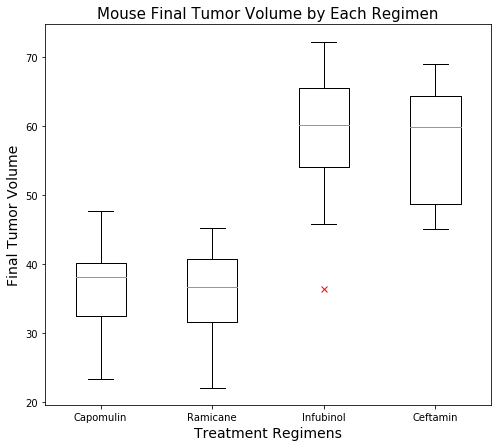

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(8,7))
plt.boxplot(tumor_vol_data,0,"rx")
plt.title("Mouse Final Tumor Volume by Each Regimen",fontsize=15)
plt.xticks(range(1,5),treatments)
plt.xlabel("Treatment Regimens",fontsize=14)
plt.ylabel("Final Tumor Volume",fontsize=14)
plt.show()

## Line and Scatter Plots

In [17]:
#Create a list of mice treated with Capomulin
capomulin_mice=mouse_merged.loc[mouse_merged["Drug Regimen"]=="Capomulin",:]
unique_list=list(capomulin_mice["Mouse ID"].unique())
print("Mice Treated with Capomulin")
mouse_list=[print(mouse) for mouse in unique_list]

Mice Treated with Capomulin
s185
x401
m601
f966
u364
y793
r554
m957
t565
i738
w914
g288
l897
b742
b128
j246
j119
w150
v923
g316
s710
l509
r944
i557
r157


Enter the mouse ID of the mouse that you would like to view data for. l897


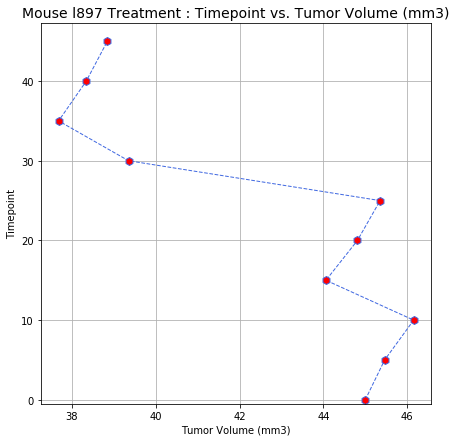

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_selection=input("Enter the mouse ID of the mouse that you would like to view data for.")
mouse=mouse_merged.loc[mouse_merged["Mouse ID"]==str(mouse_selection),:]

#create our x and y lists and create the line graph
x=list(mouse["Tumor Volume (mm3)"])
y=list(mouse["Timepoint"])

plt.figure(figsize=(7,7))
plt.plot(x,y,color="royalblue",marker="h",markerfacecolor="red",markersize=8,ls="dashed",lw=1)
plt.ylabel("Timepoint")
plt.xlabel("Tumor Volume (mm3)")
plt.ylim(0-.5,mouse["Timepoint"].max()*1.05)
plt.title(f"Mouse {mouse_selection} Treatment : Timepoint vs. Tumor Volume (mm3)",fontsize=14)
plt.grid()

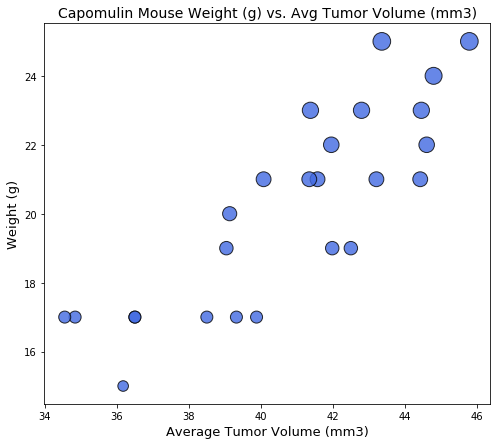

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#find all the mice that were treated with Capomulin and create a dataframe
all_Capomulin=mouse_merged.loc[mouse_merged["Drug Regimen"]=="Capomulin",:]

#create a groupby on the mouse ID
cap_mouse_id_group=all_Capomulin.groupby("Mouse ID")

#find the mouse weight and calculate the average Tumor volume
mouse_weight=cap_mouse_id_group["Weight (g)"].mean()
mouse_average_vol=cap_mouse_id_group["Tumor Volume (mm3)"].mean()

#create the scatter plot
plt.figure(figsize=(8,7))
plt.scatter(mouse_average_vol,mouse_weight, s=mouse_weight*(.5*mouse_weight),facecolors="royalblue",edgecolors="black",alpha=0.8)
plt.title("Capomulin Mouse Weight (g) vs. Avg Tumor Volume (mm3)",fontsize=14)
plt.xlabel("Average Tumor Volume (mm3)",fontsize=13)
plt.rcParams['xtick.labelsize']=13
plt.ylabel("Weight (g)",fontsize=13)
plt.rcParams['ytick.labelsize']=13
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


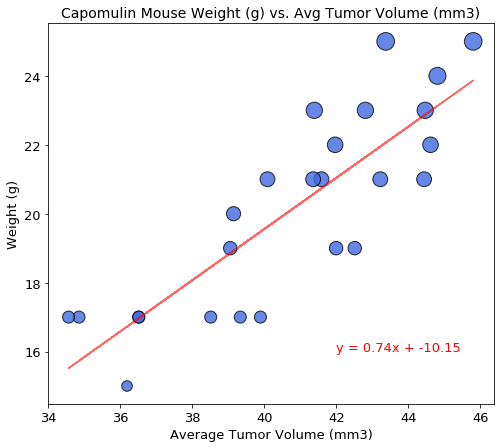

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_average_vol,mouse_weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#find the line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_average_vol, mouse_weight)
regress_values = mouse_average_vol * slope + intercept

#create a variable for the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print the scatter plot
plt.figure(figsize=(8,7))
plt.scatter(mouse_average_vol,mouse_weight, s=mouse_weight*(.5*mouse_weight),facecolors="royalblue",edgecolors="black",alpha=0.8)
plt.plot(mouse_average_vol,regress_values,"r-",alpha=.6)
plt.title("Capomulin Mouse Weight (g) vs. Avg Tumor Volume (mm3)",fontsize=14)
plt.xlabel("Average Tumor Volume (mm3)",fontsize=13)
plt.rcParams['xtick.labelsize']=13
plt.ylabel("Weight (g)",fontsize=13)
plt.rcParams['ytick.labelsize']=13
plt.annotate(line_eq,(42,16),fontsize=13,color="red", alpha=1)
plt.show()